# Import Libraries


In [1]:
import numpy as np
import pandas as pd
import openpyxl

# Data Preprocessing 


***Importing The Dataset***

In [16]:
df = pd.read_excel(r'Data\Prediction of Placement Status Data\\01 Train Data.xlsx')
df.head()

,First Name,Email ID,Quantity,Price Tier,Ticket Type,Attendee #,Group,Order Type,Currency,Total Paid,...,Attendee Status,College Name,How did you come to know about this event?,"Specify in ""Others"" (how did you come to know about this event)",Designation,Year of Graduation,CGPA,Speaking Skills,ML Knowledge,Placement Status
0,ANIKET,aniket@xyz.com,1,NaN,Art of Resume Building,2.213855e+09,NaN,Free Order,USD,0,...,Attending,D Y PATIL INSTITUTE OF MCA AND MANAGEMENT AKUR...,Email,NaN,Students,NaN,6.7,2,5,Placed
1,Dhanshree,dhanshree@xyz.com,1,NaN,Art of Resume Building,2.213859e+09,NaN,Free Order,USD,0,...,Attending,AP SHAH INSTITUTE OF TECHNOLOGY,Others,College,Students,NaN,8.2,3,2,Not placed
2,Dhiraj,dhiraj@xyz.com,1,NaN,Art of Resume Building,2.213862e+09,NaN,Free Order,USD,0,...,Attending,Don Bosco College of Engineering Fatorda Goa,Email,NaN,Students,NaN,6.5,4,3,Not placed
3,Pooja,pooja@xyz.com,1,NaN,Art of Resume Building,2.213988e+09,NaN,Free Order,USD,0,...,Attending,Pillai College of Engineering New Panvel,Email,NaN,Students,NaN,8.7,2,5,Not placed
4,Aayush,aayush@xyz.com,1,NaN,Art of Resume Building,2.214567e+09,NaN,Free Order,USD,0,...,Attending,St Xavier's College,Instagram | LinkedIn | Cloud Counselage Website,NaN,Students,NaN,9.1,3,5,Placed


***Deleting Unnecessary Columns***

In [3]:
col_to_delete = ['First Name','Email ID','Quantity', 'Price Tier', 'Ticket Type',
       'Attendee #', 'Group', 'Order Type', 'Currency', 'Total Paid',
       'Fees Paid', 'Eventbrite Fees', 'Eventbrite Payment Processing',
       'Attendee Status', 'College Name',
       'How did you come to know about this event?',
       'Specify in "Others" (how did you come to know about this event)',
       'Designation', 'Year of Graduation']

df = df.drop(columns=col_to_delete, axis=1)
df.head()

,CGPA,Speaking Skills,ML Knowledge,Placement Status
0,6.7,2,5,Placed
1,8.2,3,2,Not placed
2,6.5,4,3,Not placed
3,8.7,2,5,Not placed
4,9.1,3,5,Placed


***Updating Missing Values In The 'Placement Status Column'***

In [4]:
df1 = df
avg_ml_knw = int(df1['ML Knowledge'].mean())

df1['Placement Status'] = df1['Placement Status'].apply(lambda x: 'Placed' if pd.isnull(x) and df.loc[df1['Placement Status'].isnull(), 'CGPA'].iloc[0] > 7.5 and df1.loc[df['Placement Status'].isnull(), 'ML Knowledge'].iloc[0] > avg_ml_knw else 'Not placed' if pd.isnull(x) else x)
df1['Placement Status'].value_counts(dropna=False)

Placement Status
Not placed    4528
Placed         366
Name: count, dtype: int64

# EDA

*CGPA Distribution*

C:\Users\santa\AppData\Local\Temp\ipykernel_1224\2751973769.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df1, x='CGPA', shade=True, color='skyblue')


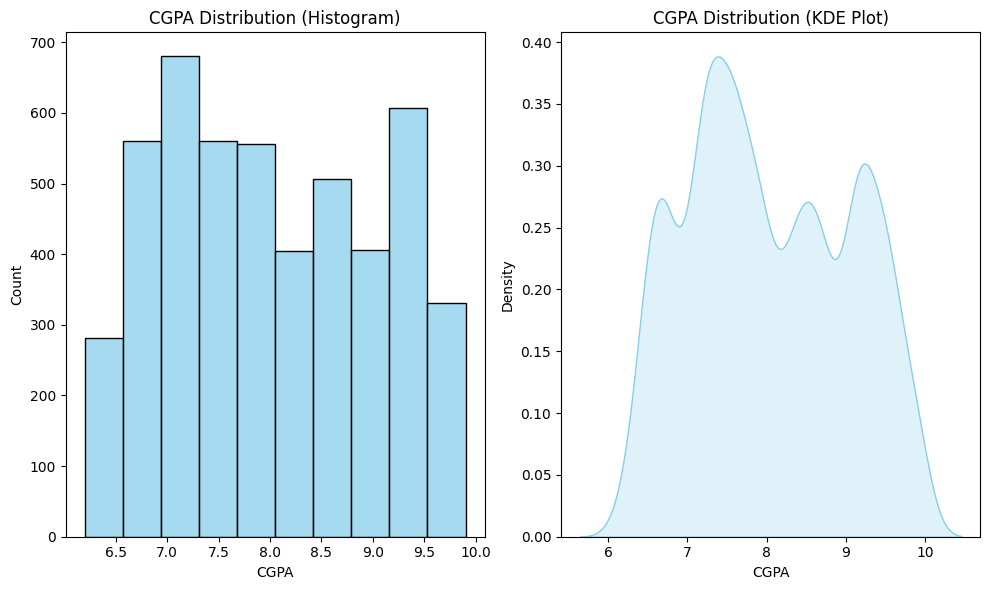

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(data=df1, x='CGPA', bins=10, kde=False, color='skyblue')
plt.title('CGPA Distribution (Histogram)')

# KDE plot
plt.subplot(1, 2, 2)
sns.kdeplot(data=df1, x='CGPA', shade=True, color='skyblue')
plt.title('CGPA Distribution (KDE Plot)')


plt.tight_layout()
plt.show()

*ML Knowlwdge Visualisation*

C:\Users\santa\AppData\Local\Temp\ipykernel_1224\4210166605.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x='ML Knowledge', shade=True, color='skyblue')


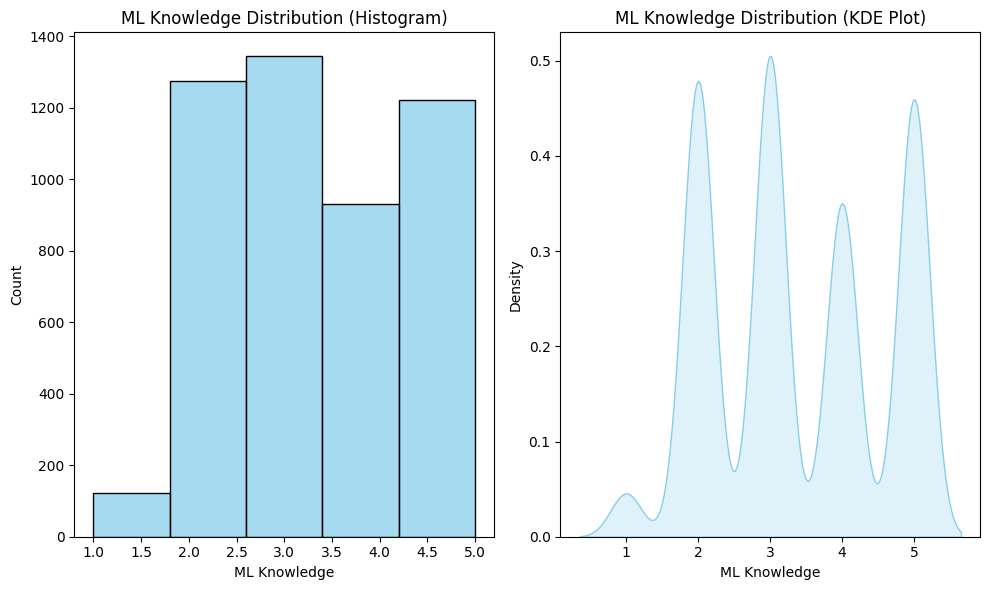

In [7]:
plt.figure(figsize=(10, 6))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='ML Knowledge', bins=5, kde=False, color='skyblue')
plt.title('ML Knowledge Distribution (Histogram)')

# KDE plot
plt.subplot(1, 2, 2)
sns.kdeplot(data=df, x='ML Knowledge', shade=True, color='skyblue')
plt.title('ML Knowledge Distribution (KDE Plot)')

plt.tight_layout()
plt.show()

*Donut Chart  Placement Status*


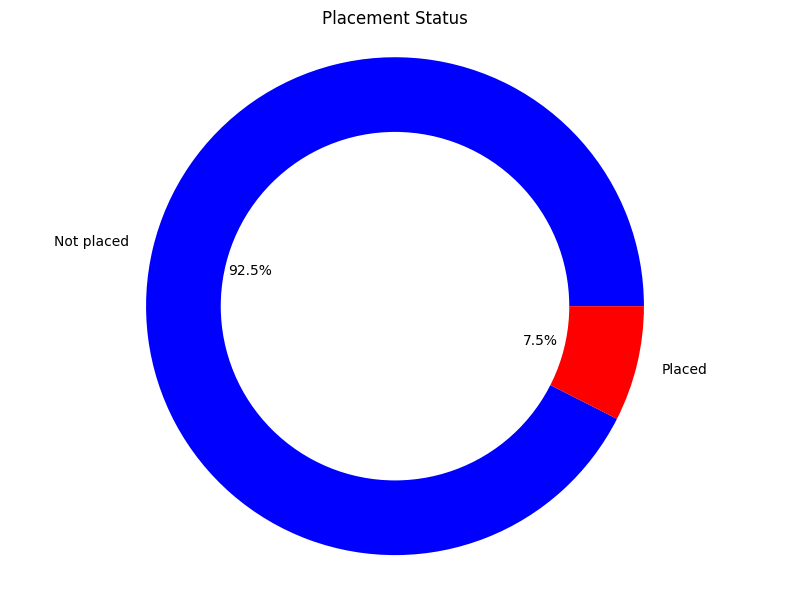

In [8]:
placement_counts = df['Placement Status'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(placement_counts, labels=placement_counts.index, autopct='%1.1f%%', colors=['blue', 'red'])

# Draw a white circle at the center to create a donut effect
centre_circle = plt.Circle((0, 0), 0.7, color='white', linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Placement Status')
plt.axis('equal')
plt.tight_layout()
plt.show()

***Converting Into The Numerical Value***

In [9]:
df1['Placement Status'] = df['Placement Status'].map({'Placed': 1, 'Not placed': 0})
df1

,CGPA,Speaking Skills,ML Knowledge,Placement Status
0,6.7,2,5,1
1,8.2,3,2,0
2,6.5,4,3,0
3,8.7,2,5,0
4,9.1,3,5,1
...,...,...,...,...
4889,9.0,3,2,0
4890,7.2,4,3,0
4891,8.5,2,3,0
4892,6.5,5,5,0


***Creating A Cleaned Training Dataset***

In [10]:
new_excel_file = r'Data\Prediction of Placement Status Data\\Cleaned_Training_Data.xlsx'

df1.to_excel(new_excel_file, index=False)

# Training Prediction Model

***Use Of Decision Tree Classifier***

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report


train_df = pd.read_excel('Data/Prediction of Placement Status Data/Cleaned_Training_Data.xlsx')

X = train_df[['CGPA', 'ML Knowledge']]
y = train_df['Placement Status']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


decision_tree_clf = DecisionTreeClassifier()

decision_tree_clf.fit(X_train_scaled, y_train)

y_pred = decision_tree_clf.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Decision Tree Classifier")
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(report)

Decision Tree Classifier
Accuracy: 0.91
Classification Report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       893
           1       0.00      0.00      0.00        86

    accuracy                           0.91       979
   macro avg       0.46      0.50      0.48       979
weighted avg       0.83      0.91      0.87       979



d:\Project\Machine Learning IP-2509\virtual\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Project\Machine Learning IP-2509\virtual\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Project\Machine Learning IP-2509\virtual\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

# Store The Model Into The File

In [12]:
import joblib
joblib.dump(decision_tree_clf, 'decision_tree_model.pkl')


['decision_tree_model.pkl']

# Fill The Test Data

***Load The 02-Test Data***

In [13]:
test_df = pd.read_excel(r'Data\Prediction of Placement Status Data\\02 Test Data.xlsx')
test_df.head()

,First Name,Email ID,Quantity,Price Tier,Ticket Type,Attendee #,Group,Order Type,Currency,Total Paid,...,Attendee Status,College Name,How did you come to know about this event?,"Specify in ""Others"" (how did you come to know about this event)",Designation,Year of Graduation,CGPA,Speaking Skills,ML Knowledge,Placement Status
0,Sahil,sahil@xyz.com,1,NaN,Hello ML and DL,2.293940e+09,NaN,Free Order,USD,0,...,Attending,"symbiosis institute of technology, pune",Whatsapp,NaN,Students,NaN,7.8,3,3,NaN
1,Amrita,amrita@xyz.com,1,NaN,Hello ML and DL,2.293941e+09,NaN,Free Order,USD,0,...,Attending,"mit academy of engineering ,alandi",Whatsapp,NaN,Students,NaN,9.1,3,3,NaN
2,Mamta,mamta@xyz.com,1,NaN,Hello ML and DL,2.293941e+09,NaN,Free Order,USD,0,...,Attending,a. c. patil college of engineering,Whatsapp,NaN,Students,NaN,6.9,2,2,NaN
3,Bhagyashri,bhagyashri@xyz.com,1,NaN,Hello ML and DL,2.293946e+09,NaN,Free Order,USD,0,...,Attending,wilson college,Others,NaN,Students,NaN,8.4,4,4,NaN
4,Divyanshu,divyanshu@xyz.com,1,NaN,Hello ML and DL,2.293956e+09,NaN,Free Order,USD,0,...,Attending,"ld college of engineering, ahmedabad, gujarat",Whatsapp,NaN,Students,NaN,6.7,5,5,NaN


***Load The Model And Predict***

In [14]:
loaded_model = joblib.load('decision_tree_model.pkl')

new_data_scaled = scaler.transform(test_df[['CGPA', 'ML Knowledge']])
new_predictions = loaded_model.predict(new_data_scaled)

def get_placement_status(prediction):
    return "Placed" if prediction == 1 else "Not Placed"

test_df['Placement Status'] = [get_placement_status(pred) for pred in new_predictions]



***Save The Results***

In [15]:
test_df.to_excel(r'Data\Prediction of Placement Status Data\\ans_test_file.xlsx', index=False)  